## Redrock fitting output for a group of targets

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
froot = '/project/projectdirs/desi/datachallenge/reference_runs/19.2/'
ipix = 5263
spec_path = 'spectro/redux/mini/spectra-64/{:d}/{:d}/'.format(ipix//100, ipix)
fh5 = froot + spec_path + 'redrock-64-{:d}.h5'.format(ipix)

In [4]:
rrh5 = h5py.File(fh5, 'r')
print(list(rrh5.keys()))

['targetids', 'zbest', 'zfit', 'zscan']


---

### targetids

In [5]:
rrh5['targetids']

<HDF5 dataset "targetids": shape (875,), type "<i8">

In [6]:
idx = 10
tid = rrh5['targetids'][idx]
print(tid)

288230398226333718


---

### zbest

In [7]:
rrh5['zbest']

<HDF5 dataset "zbest": shape (875,), type "|V400">

In [8]:
print(rrh5['zbest'].dtype.names)

('targetid', 'chi2', 'coeff', 'z', 'zerr', 'zwarn', 'zz', 'zzchi2', 'npixels', 'spectype', 'subtype', 'ncoeff', 'deltachi2', 'NUMEXP', 'NUMTILE')


In [9]:
for name in rrh5['zbest'].dtype.names:
    print(name)
    print(rrh5['zbest'][idx][name])
    print('-'*60)

targetid
288230398226333718
------------------------------------------------------------
chi2
8707.04221664
------------------------------------------------------------
coeff
[  31.20463288  335.33502521  -79.62722865   74.11621399   -7.49455108
    1.19096598  -40.81881605    2.96172409    2.0700932    -9.90930506]
------------------------------------------------------------
z
0.352423509173
------------------------------------------------------------
zerr
0.000121192125755
------------------------------------------------------------
zwarn
0
------------------------------------------------------------
zz
[ 0.35121072  0.35134415  0.35147758  0.35161101  0.35174445  0.35187788
  0.35201131  0.35214474  0.35227818  0.35241161  0.35254504  0.35267847
  0.35281191  0.35294534  0.35307877]
------------------------------------------------------------
zzchi2
[ 8726.50457076  8734.17679248  8728.21310085  8718.48112082  8719.17502616
  8717.74409611  8714.21812292  8712.01053899  8708.4802742

---

### zfit

In [10]:
rrh5['zfit']

<HDF5 group "/zfit" (875 members)>

In [11]:
# keys are the target ids as string
list(rrh5['zfit'][str(tid)].keys())

['zfit']

In [12]:
print(rrh5['zfit'][str(tid)]['zfit'].dtype.names)

('targetid', 'chi2', 'coeff', 'z', 'zerr', 'zwarn', 'zz', 'zzchi2', 'npixels', 'spectype', 'subtype', 'ncoeff', 'znum', 'deltachi2', 'NUMEXP', 'NUMTILE')


In [105]:
# more fitted chi2 besides the best one
for chi2, deltachi2 in zip(rrh5['zfit'][str(tid)]['zfit']['chi2'], 
                           rrh5['zfit'][str(tid)]['zfit']['deltachi2']):
    print('{:10.2f} {:10.2f}'.format(chi2, deltachi2))

   8707.04      45.30
   8752.34       4.42
   8756.77      16.58
   8773.34      39.18
   8812.53      12.80
   8825.33       1.39
   8826.72      24.60
   8851.32       0.00
   8962.24       0.00


---

### zscan

In [106]:
rrh5['zscan']

<HDF5 group "/zscan" (10 members)>

In [39]:
list(rrh5['zscan'].keys())

['GALAXY',
 'QSO',
 'STAR:::A',
 'STAR:::B',
 'STAR:::CV',
 'STAR:::F',
 'STAR:::G',
 'STAR:::K',
 'STAR:::M',
 'STAR:::WD']

In [107]:
rrh5['zscan']['GALAXY']

<HDF5 group "/zscan/GALAXY" (4 members)>

In [108]:
list(rrh5['zscan']['GALAXY'].keys())

['penalty', 'redshifts', 'zchi2', 'zcoeff']

In [115]:
for kk in rrh5['zscan']['GALAXY'].keys():
    print(rrh5['zscan']['GALAXY'][kk])

<HDF5 dataset "penalty": shape (875, 1446), type "<f8">
<HDF5 dataset "redshifts": shape (1446,), type "<f8">
<HDF5 dataset "zchi2": shape (875, 1446), type "<f8">
<HDF5 dataset "zcoeff": shape (875, 1446, 10), type "<f8">


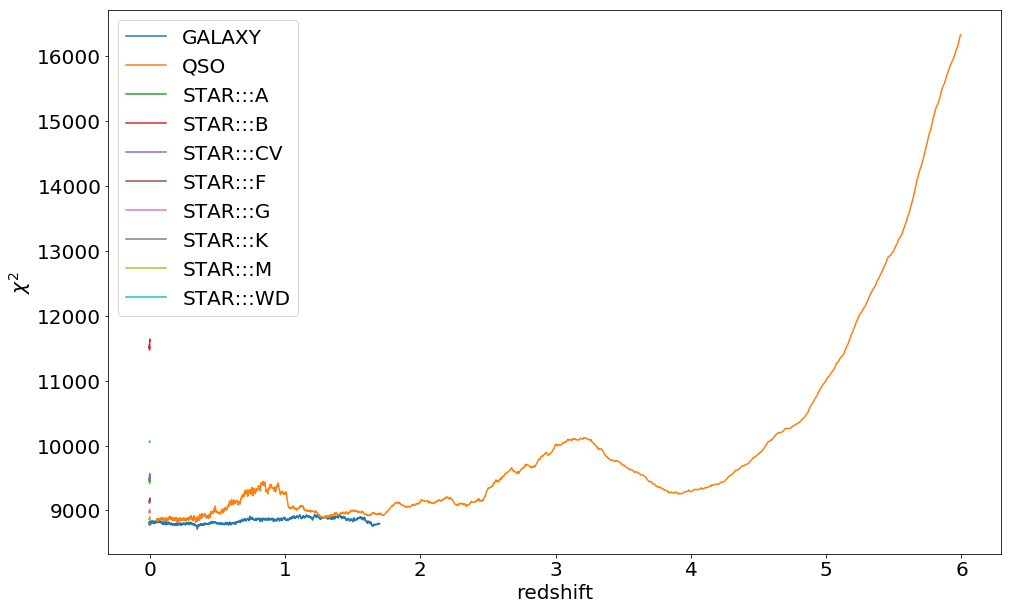

In [132]:
# plot all chi2
rcParams['figure.figsize'] = [16, 10]
rcParams['font.size'] = 20
fig, (ax) = plt.subplots(1, 1)

templates = list(rrh5['zscan'])
for tt in templates:
#     if tt != 'GALAXY': continue
    redshifts = rrh5['zscan'][tt]['redshifts']
    zchi2 = rrh5['zscan'][tt]['zchi2'][idx]
    ax.plot(redshifts, zchi2, label=tt)

ax.set_xlabel('redshift')
ax.set_ylabel('$\chi^2$')

ax.legend()
plt.show()